In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

OVER-VIEW

**Heart Stroke is a medical emergency that can lead to death of a person. There can be a number of factors that can lead to Heart Stroke. To understand about the same , i have taken a LIVE dataset from Kaggle which contained the data of 5110 human beings with 11 variable factors. The variables which i considered in the analysis were Age, Hypertension,Heart disease,Ever married,Work Type,Residence type,average glucose level,BMI and Smoking Status. The data was received in a CSV format. For completing the task the various libraries used were pandas,numpy,matplotlib,seaborn etc.**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:

import io
df = pd.read_csv(io.BytesIO(uploaded["healthcare-dataset-stroke-data.csv"]))

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df["bmi"].mean()

28.893236911794673

**1.Decision on what need to be done with NULL value of BMI. In case your are removing null values - Why?**


In [ ]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**I have replaced NULL values in bmi with the Mean value of bmi since the age group of those whose bmi was misiing was above 50 to 80 and their mean value is almost equal to the total mean value.**

**3.How many person get stroke based on the worktype ?**

In [ ]:
print('Unique Value\n',df['work_type'].unique())

Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [ ]:
print('Value Counts\n',df['work_type'].value_counts())

Value Counts
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


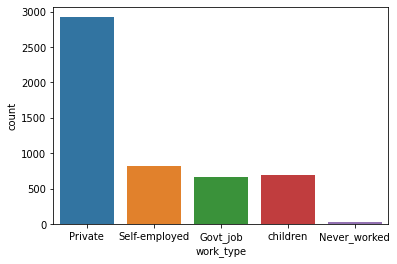

In [ ]:
sns.countplot(data=df,x='work_type')

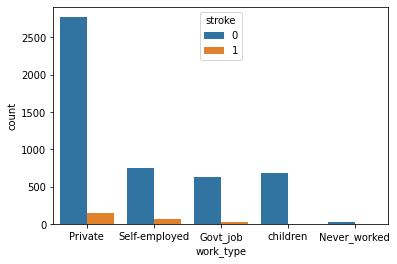

In [ ]:
sns.countplot(data=df,x='work_type',hue='stroke')

In [ ]:
df[df.stroke==1].work_type.value_counts()

Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64

**Based on WorkType - 249 people are getting stroke . People working in Private sector is having more chance of getting Stroke as per this database. And People who have never worked are not getting Stroke at all.**


**4. Gender Wise - What is the ratio of marriage people getting stroke ?**

In [ ]:
print('Value Counts\n',df['ever_married'].value_counts())

Value Counts
 Yes    3353
No     1757
Name: ever_married, dtype: int64


In [ ]:
df[df.stroke==1].ever_married.value_counts()

Yes    220
No      29
Name: ever_married, dtype: int64

In [ ]:
df[df.stroke==1].gender.value_counts()

Female    141
Male      108
Name: gender, dtype: int64

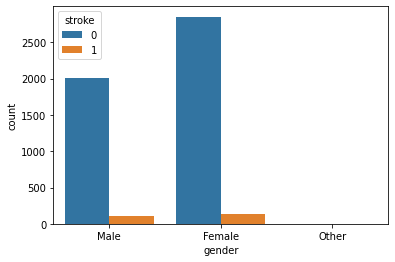

In [ ]:
sns.countplot(data=df,x='gender',hue='stroke')

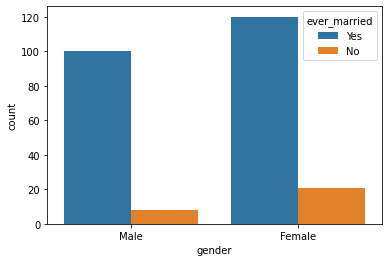

In [ ]:
sns.countplot(x="gender", hue="ever_married",data=df[df.stroke==1])
plt.show()

In [ ]:
t = df[(df["stroke"]==1) & (df["ever_married"]=="Yes")].gender.value_counts()
t

Female    120
Male      100
Name: gender, dtype: int64

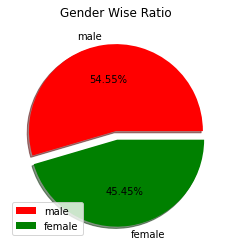

In [ ]:
plt.pie(t,colors=["red","green"],labels=["male","female"],autopct="%0.2f%%",
        shadow=True,explode=(0,0.1) )
plt.title("Gender Wise Ratio")
plt.legend(loc="lower left")
plt.show()

**Gender Wise - Married Males are getting higher stroke rate**

**5.Which age group getting high stroke?**

In [ ]:
df['age'].nunique()

104

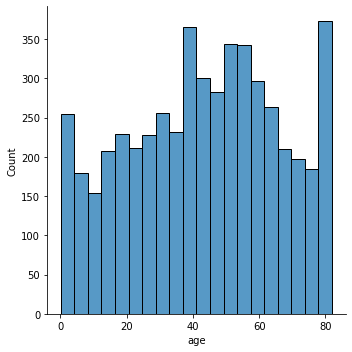

In [ ]:
sns.displot(df['age'])

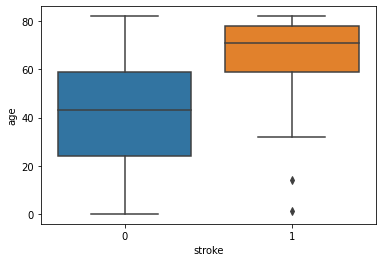

In [ ]:
sns.boxplot(data=df,x='stroke',y='age')

**People in theage group of 60 to 80 has got higher chances of getting STROKE**
**As per the graph - few people below age of 20 years are also getting STROKE **


**6. How many married/Not married male person doing smoking?**

In [ ]:
pd.crosstab([df["gender"],df["ever_married"]],df["smoking_status"],margins=True).style.background_gradient(cmap="coolwarm_r")

**Married Male - Smokers count is 271 . Not married male - Smokers Count is 66**

**7. How many people between age group 40 to 60 with hypertension are getting stroke?**


In [ ]:
print('Value Counts\n',df['hypertension'].value_counts())

Value Counts
 0    4612
1     498
Name: hypertension, dtype: int64


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**12 people between age group 40 and 60 with hypertension are getting STROKE. Hypertension and Stroke is not directly connected as per this data.**


8. **What is the percentage of Urban/Rural people getting stroke ?**

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
t = df[(df["stroke"]==1)].Residence_type.value_counts()
t

Urban    135
Rural    114
Name: Residence_type, dtype: int64

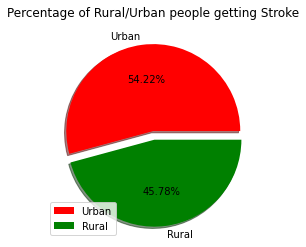

In [ ]:
plt.pie(t,colors=["red","Green"],labels=["Urban","Rural"],autopct="%0.2f%%",
        shadow=True,explode=(0,0.1) )
plt.title("Percentage of Rural/Urban people getting Stroke")
plt.legend(loc="lower left")
plt.show()

**54.22% of Urban People are getting Stroke while 45.78% of Rural people are prone to getting stroke. People living in Urban area are more exposed to getting stroke compared to those people living in Rural areas.**



9. **What is the average glucose level of Non smoking Male ?**

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


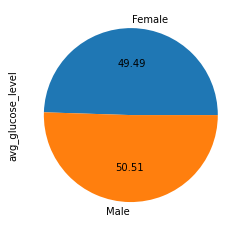

In [ ]:
t = df[(df["smoking_status"]=="never smoked")]
t.groupby("gender")["avg_glucose_level"].mean().plot(kind="pie",autopct="%0.2f")

In [ ]:
t = df[(df["smoking_status"]=="never smoked")]
t.groupby("gender")["avg_glucose_level"].mean()

gender
Female    106.793263
Male      108.975852
Name: avg_glucose_level, dtype: float64

**Average glucose level of Non smoking male is 108.97**

10. **How many Teenagers getting Stroke ? What is the reason ? (Urban area/ Smoking/ BMI / Glucose Level etc )**


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df[(df["age"]<=19)& (df["stroke"]==1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


**Normal BMI of a teenage girl is between 18.5 and 24.9. The BMI of the person identified here is 30.9 and it is one of the reason she got stroke at a very young age. Similarly , the average glucose level of a teenage girl is 90 to 130 but the glucose leel of the person identified here is only 57.93 which is very low. Hence the reason for this person getting stroke are low glucose level and high BMI**


In [ ]:
t = df[(df["stroke"]==1)].age.value_counts()
t

78.00    21
79.00    17
80.00    17
81.00    14
57.00    11
76.00    10
63.00     9
82.00     9
68.00     9
74.00     9
59.00     8
77.00     8
71.00     7
58.00     7
75.00     6
54.00     6
72.00     6
69.00     6
61.00     6
70.00     6
51.00     4
73.00     4
60.00     4
66.00     4
50.00     3
64.00     3
49.00     3
39.00     3
65.00     3
45.00     3
56.00     3
67.00     3
52.00     2
53.00     2
48.00     2
38.00     2
55.00     2
1.32      1
14.00     1
43.00     1
47.00     1
46.00     1
32.00     1
42.00     1
Name: age, dtype: int64

**Only one Teeneager is getting stoke as per the above data.** 


**11. What is the relationship between BMI & Stroke?**

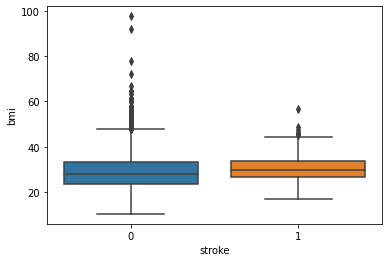

In [ ]:
sns.boxplot(data=df,x='stroke',y='bmi')

In [ ]:
a = df[df["stroke"]==1]["bmi"]

(array([ 7., 29., 60., 53., 28., 17.,  7.,  6.,  1.,  1.]),
 array([16.9 , 20.87, 24.84, 28.81, 32.78, 36.75, 40.72, 44.69, 48.66,
        52.63, 56.6 ]),
 <a list of 10 Patch objects>)

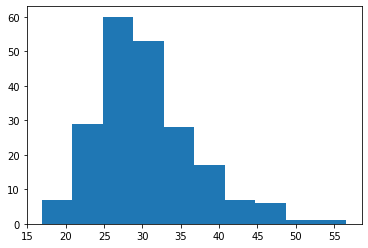

In [ ]:
plt.hist(a)

In [ ]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


**No relationship seen between BMI  & Stroke**


12. What is the percentage of people having heart disease getting stroke/not stroke ?

In [ ]:
t = df[(df["stroke"]==1)].heart_disease.value_counts()
t

0    202
1     47
Name: heart_disease, dtype: int64

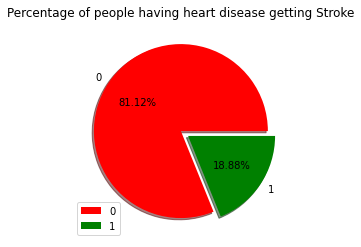

In [ ]:
plt.pie(t,colors=["red","Green"],labels=["0","1"],autopct="%0.2f%%",
        shadow=True,explode=(0,0.1) )
plt.title("Percentage of people having heart disease getting Stroke")
plt.legend(loc="lower left")
plt.show()

**18.88 % of people having heart disease is having chance of getting STROKE**


In [ ]:
t = df[(df["stroke"]==0)].heart_disease.value_counts()
t

0    4632
1     229
Name: heart_disease, dtype: int64

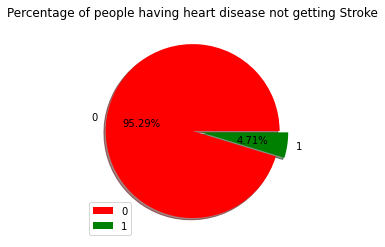

In [ ]:
plt.pie(t,colors=["red","Green"],labels=["0","1"],autopct="%0.2f%%",
        shadow=True,explode=(0,0.1) )
plt.title("Percentage of people having heart disease not getting Stroke")
plt.legend(loc="lower left")
plt.show()

**4.71% of people having heart disease is not getting stroke.**


13. What is the ratio of hypertension with Gender and worktype wise ? (group by)

In [ ]:
hp = df[df["hypertension"]==1]
t = hp.groupby(["gender","work_type"])["hypertension"].sum()


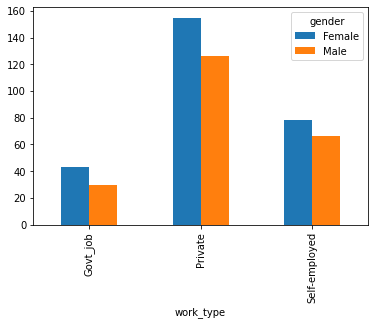

In [ ]:

hp.groupby("work_type").gender.value_counts().unstack().plot.bar()

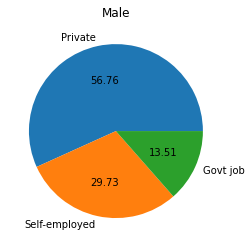

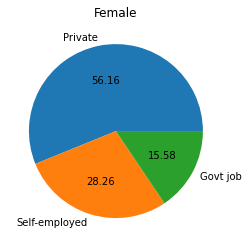

In [ ]:
for i in ["Male","Female"]:
  a = hp[hp["gender"]==i].work_type.value_counts()
  plt.pie(a,autopct="%0.2f",labels=["Private","Self-employed","Govt job"])
  plt.title(i)

  plt.show()

In [ ]:
a

Private          126
Self-employed     66
Govt_job          30
Name: work_type, dtype: int64

# ***14. Which gender has got high risk of getting stroke? ***

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
t = df[(df["stroke"]==1)].gender.value_counts()
t

Female    141
Male      108
Name: gender, dtype: int64

**Female has got high risk of getting Stroke compared to male**

**15 . Make a category of Glucose level of High /Low and Average with different age group (teenager , Adult & Elder) ?**

In [ ]:
age_group = []
for i in range(df.shape[0]):
  if df["age"][i]<=10:
    age_group.append("Child")
  elif df["age"][i]>10 and df["age"][i]<=20:
    age_group.append("Teenagers")
  elif df["age"][i]>20 and df["age"][i]<=40:
    age_group.append("Adult")
  elif df["age"][i]>40:
    age_group.append("Elder")


In [ ]:
len(age_group)

5110

In [ ]:
df.shape[0]

5110

In [ ]:
df["Age_group"] = age_group

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elder
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Elder
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elder
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Elder
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elder
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,Elder
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Elder
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Adult
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Elder


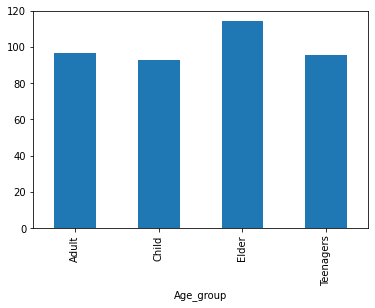

In [ ]:
df.groupby("Age_group")["avg_glucose_level"].mean().plot(kind="bar")

**CONCLUSION**


In this project, we have analysed 7 major factors that might result in STROKE.
**Factor No: 1 - Age Group :** Human beings between age of 60 to 80 is having higher chances of getting Stroke.
**Factor No:2 - Gender :** Females have higher chances of getting stroke compared to male.
**Factor No:3 - Heart Disease **: Form the Live data , it is notcied that nearly 19% of people having heart disease is having chances of getting Stroke while less than 5% with heart disease is not geting Stroke.
**Factor No: 4 - Hypertension :** Hypertension & Stroke is not directly connected as per the analysis of the given dataset. One another observation with respect ot hypertension noted from this data set is that the hypertension is more in males & females working with Private sector and it is less in those working in Government sector. It is above 55% for people working in private sector while it is below 15% in those working with Government sector. So it is better to obtain job in Government sector to reduce occurance of hypertension.
**Factor No:5 - Residence Type **: People living in Urban area are more prone to getting stroke compared to those living in rural area.
**Factor No: 6 - Marital Status** : Married Males are getting more stroke.
**Factor No: 7 - BMI :** No direct relationship is noted beween BMI & Stroke as per this data. But it is observed that a person with low glucose level and high BMI having chances of getting Stroke.
 